# Тестовое задание НИУ ВШЭ

## Часть 2. Построение графиков
На основании обработанных данных постройте по одной диаграмме рассеяния для каждой области (area) (пример внешнего вида см. в приложенном svg-файле).  
Требования к визуализации:  
    - Наличие Footer-подписи на изображении  
    - Наличие легенды цветов и кластеров  
    - Перенос слишком длинных словосочетаний (например, слова длиннее 15 символов, можно разбить на "solar\n cell")  
    - Минимизация наложения (слепливания) подписей к друг на друга (постарайтесь сделать так, чтобы наложение было минимальным)  
    - Обводка точек.  

Формат представления выходных данных: png-файлы размером не менее 1500х1500 пикселей с визуализациями  для каждой области (area).  

Выполнение данной работы желательно с помощью одной из библиотек:  
●	ggplot2 ( R )  
●	Matploptlib  (Python)  
●	plotly (Python) и т.п.  


Требования к результатам:  
●	Код для первой части задания  
●	Код для второй части задания  
●	Таблица с трансформированными данными  
●	Набор визуализаций  
Предпочтительный формат представления кода - GitHub или gist.github, визуализаций и таблиц - Google Docs  


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette())

In [2]:
output_data = pd.read_excel('output_data.xlsx')

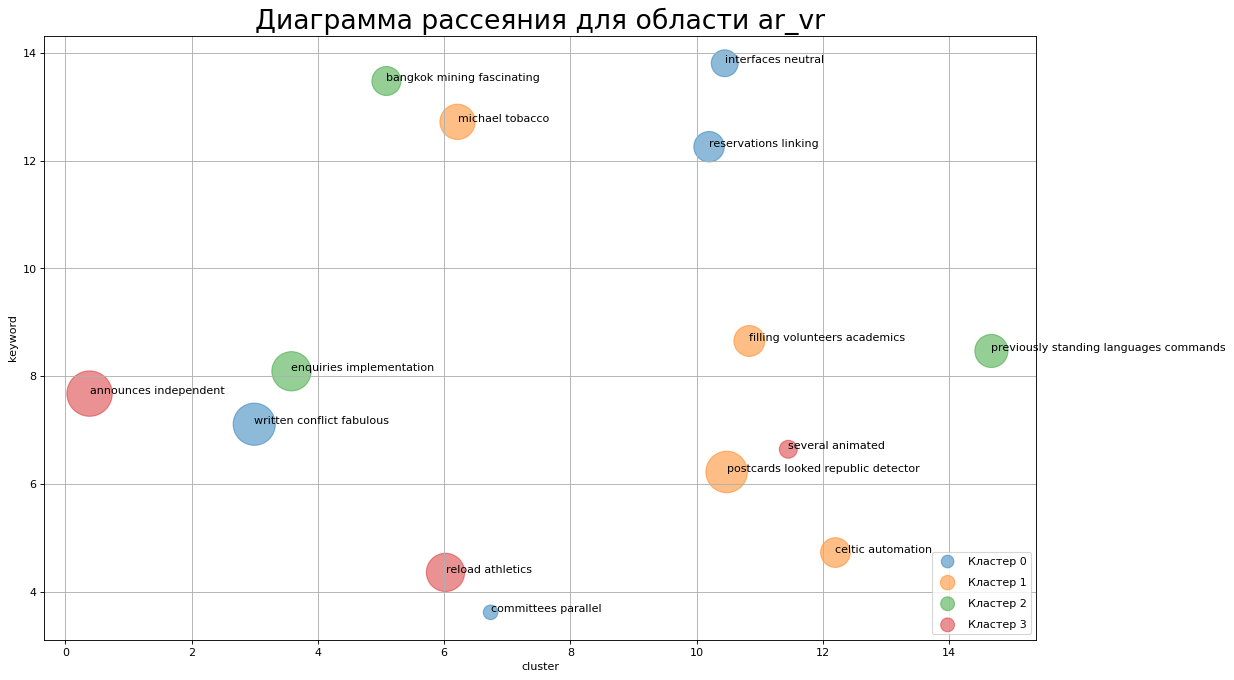

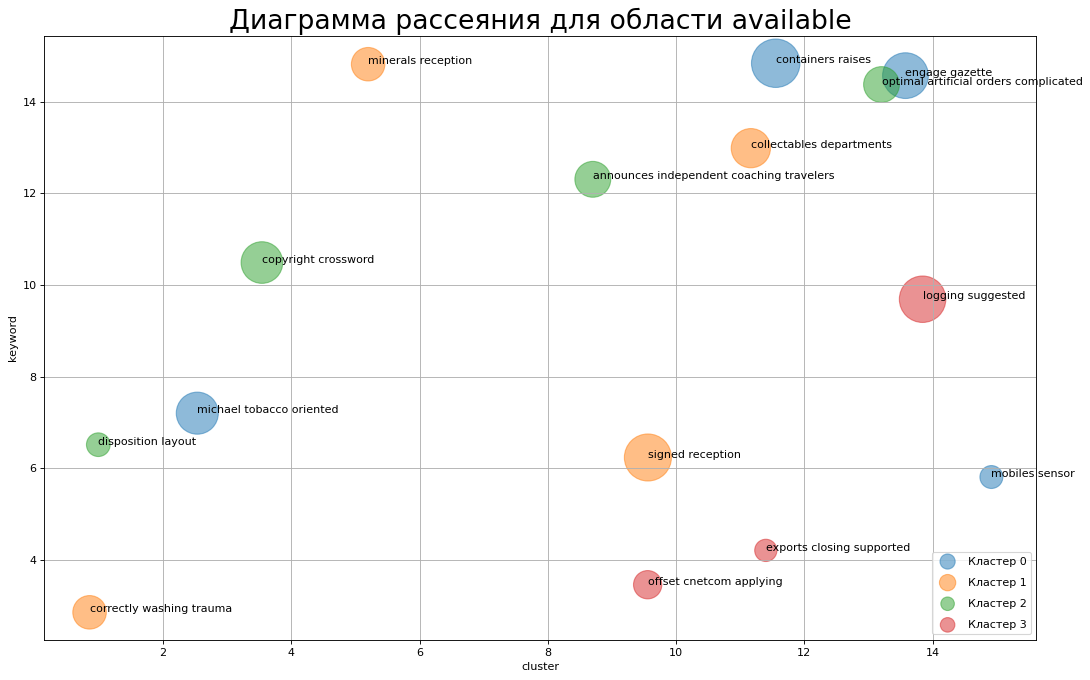

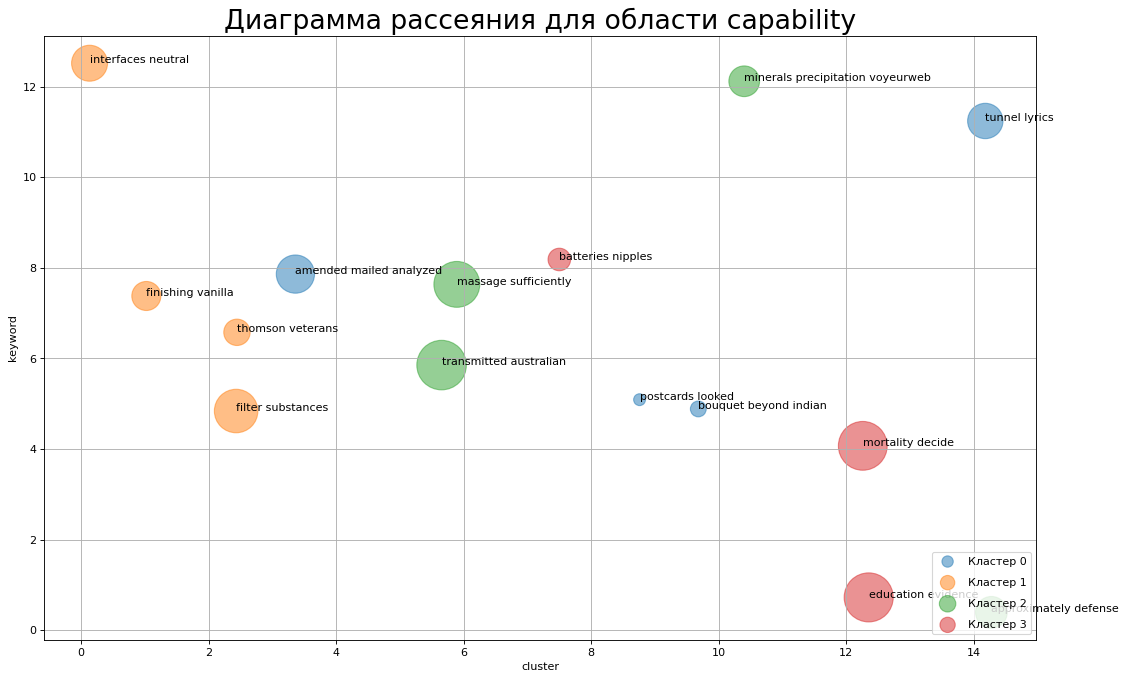

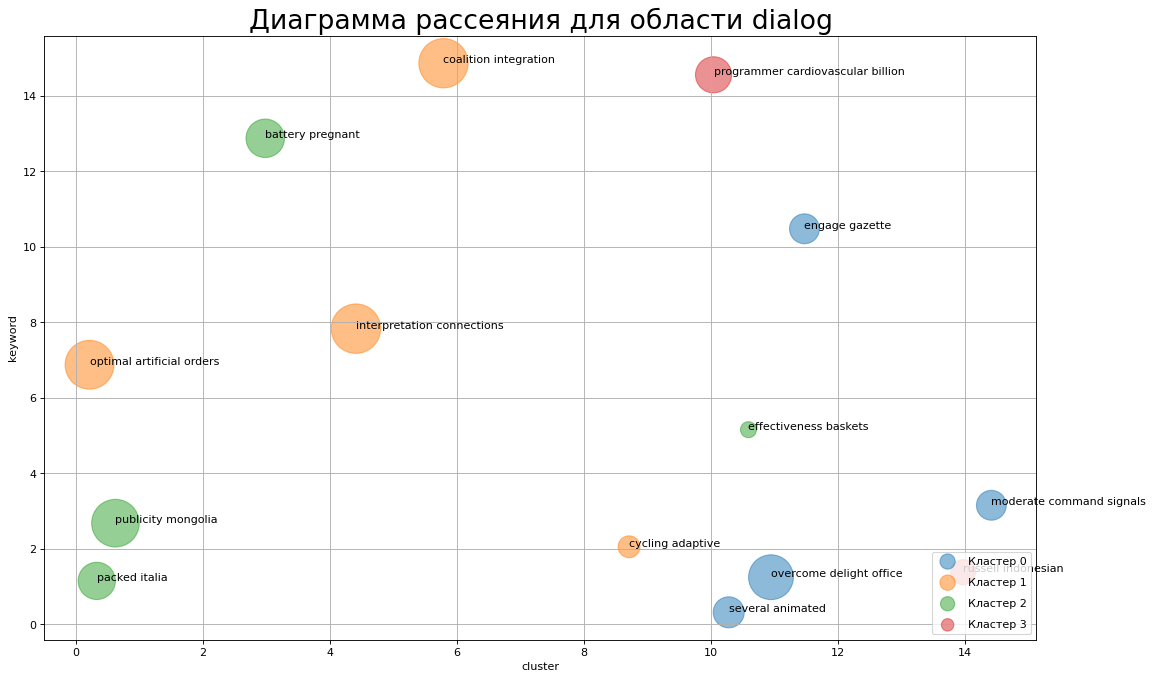

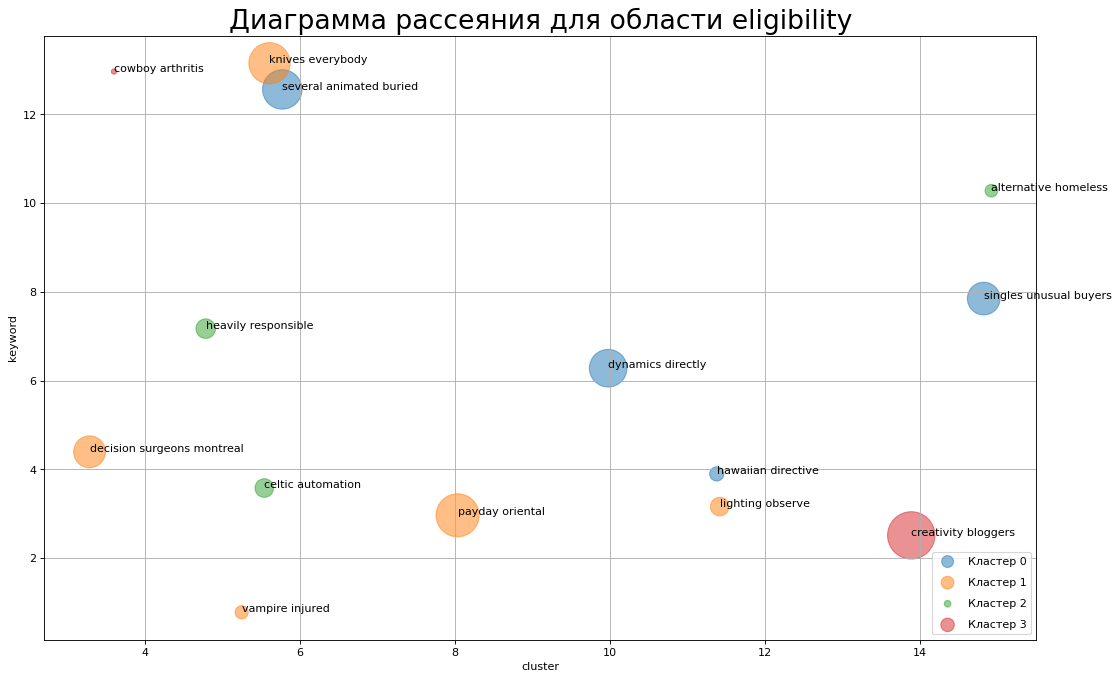

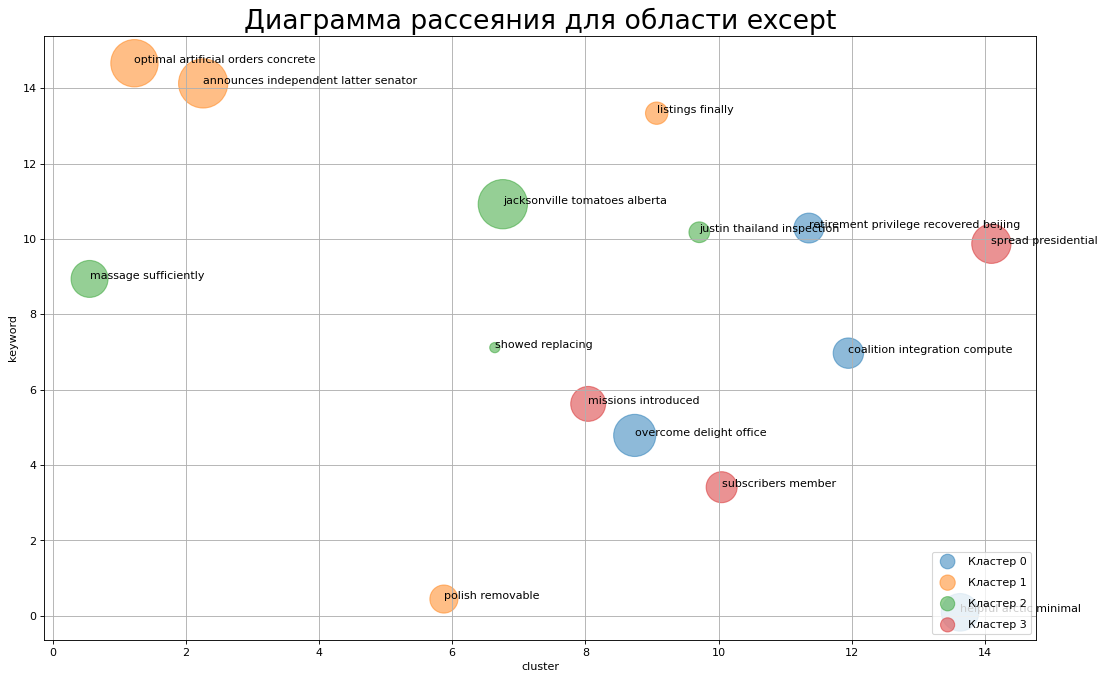

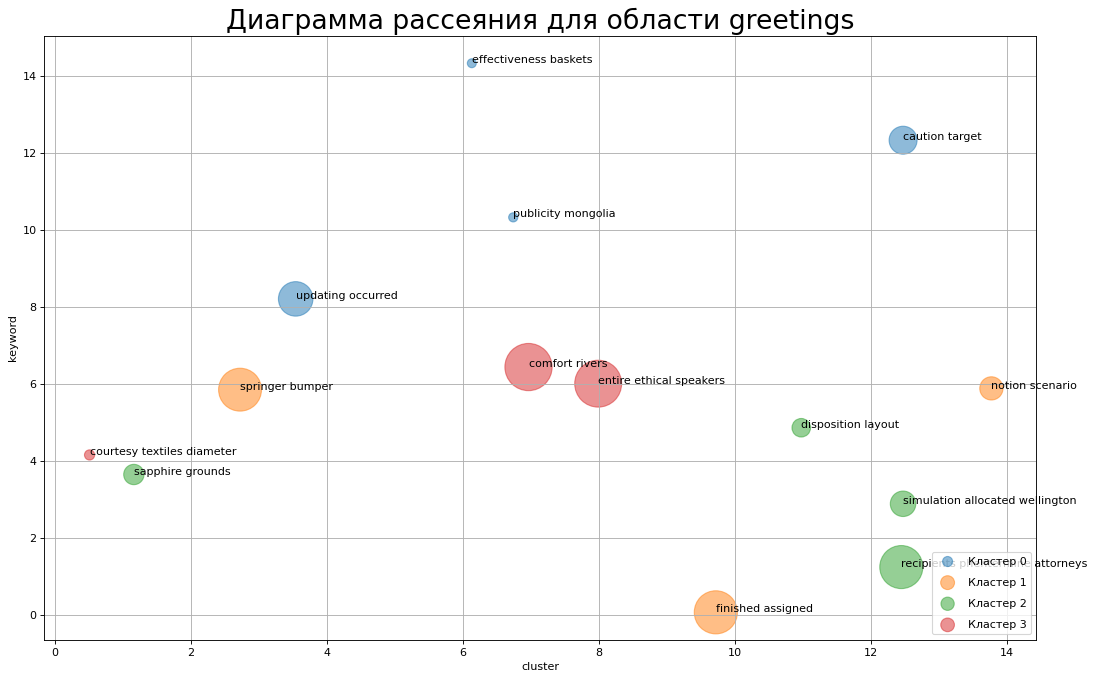

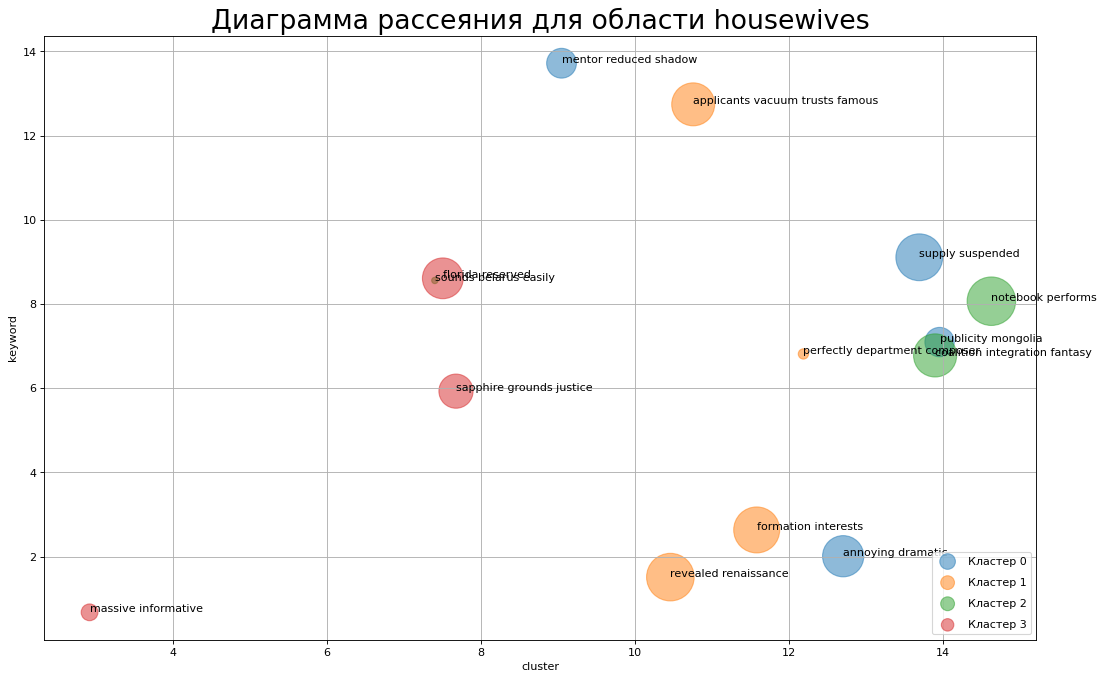

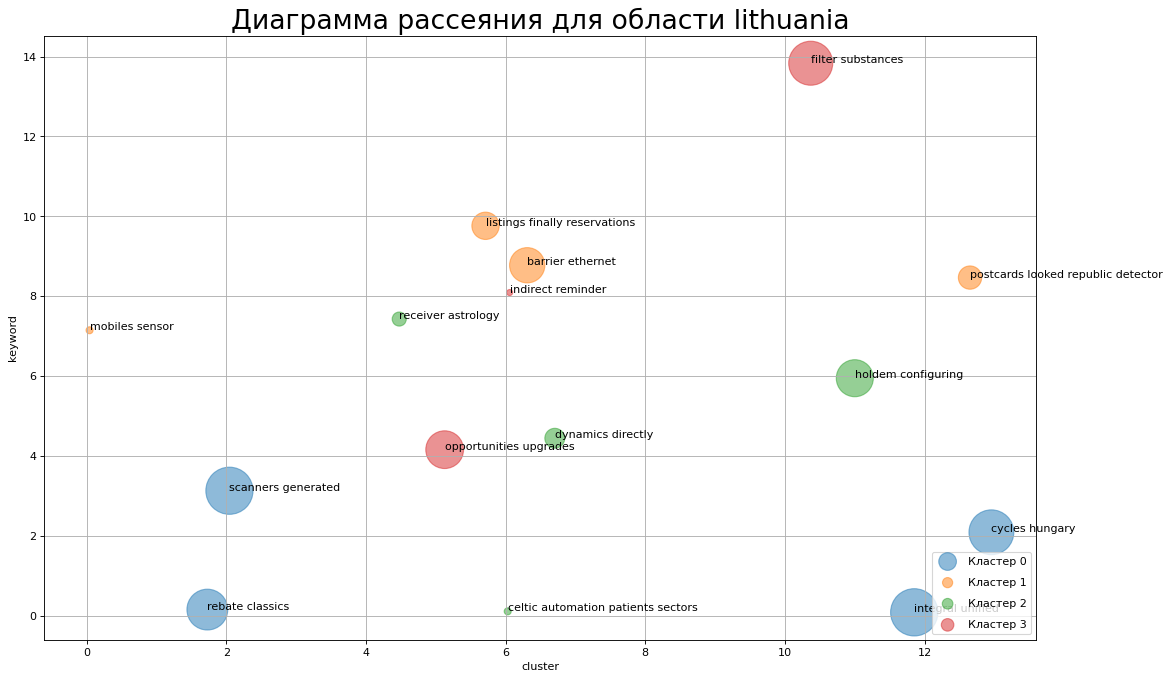

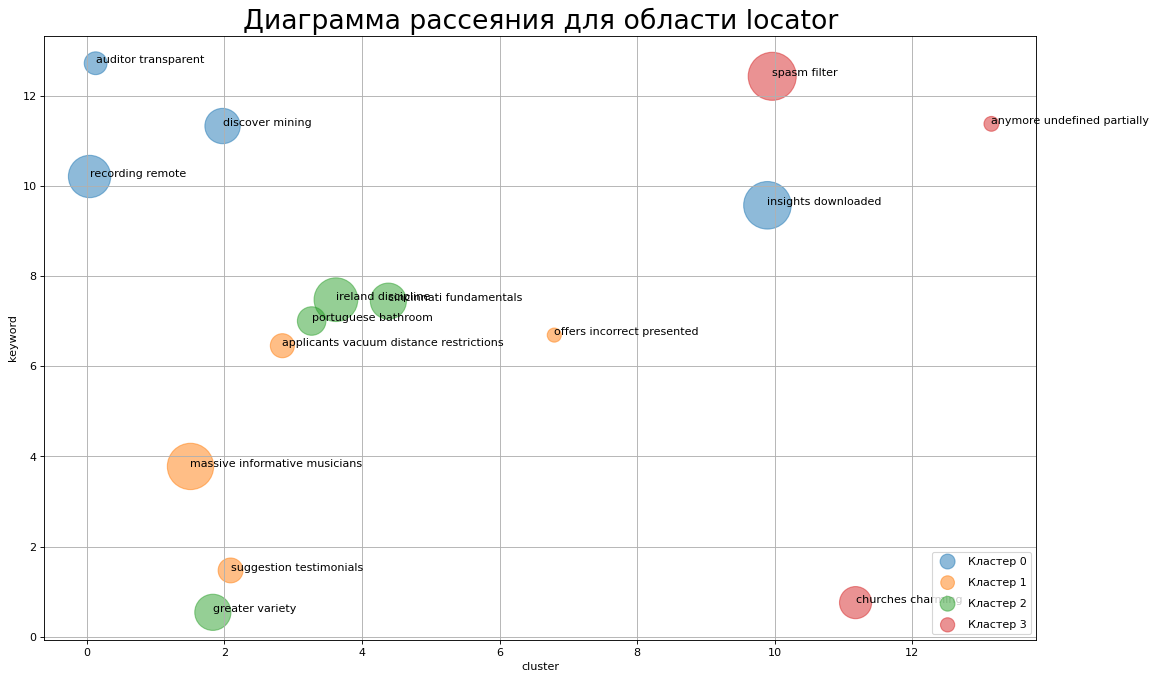

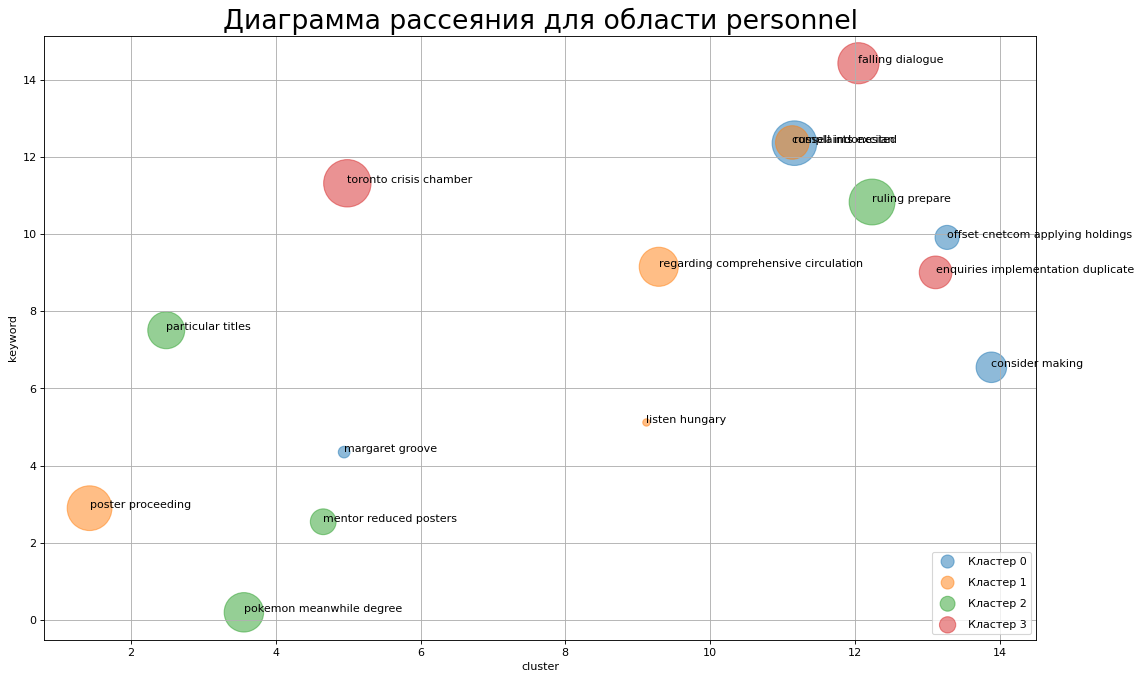

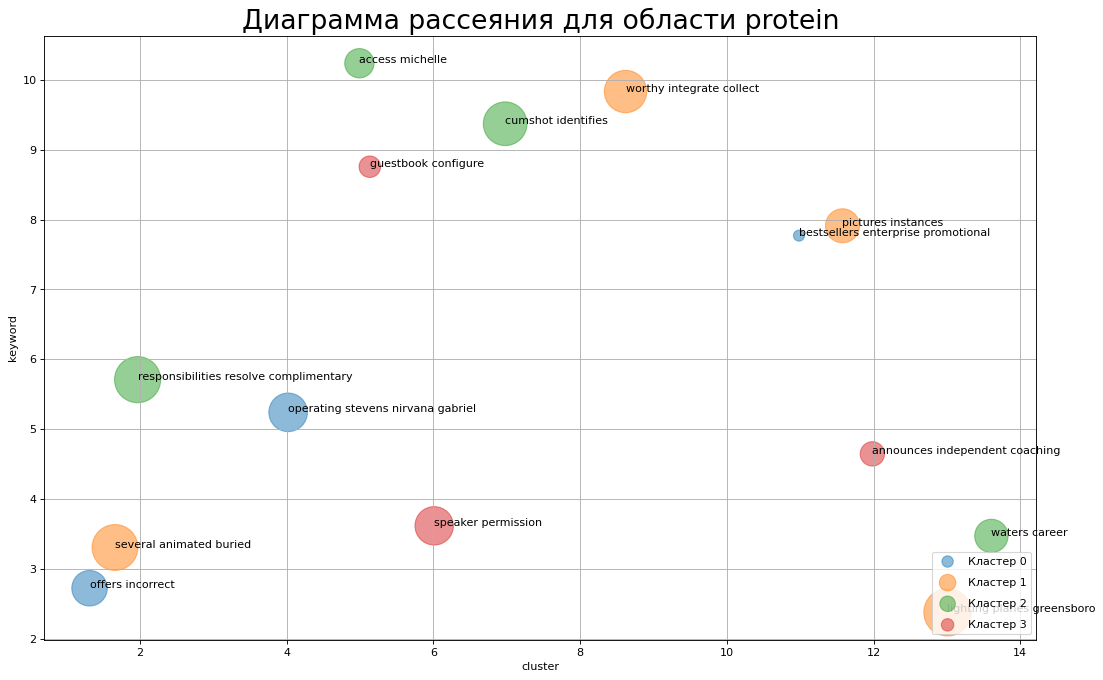

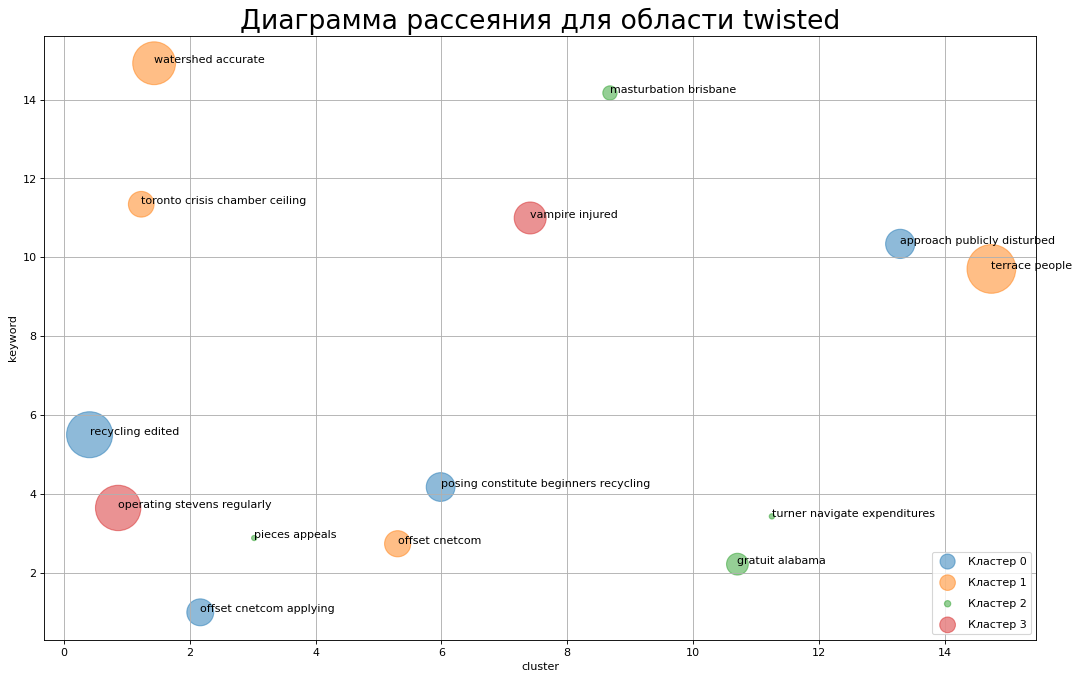

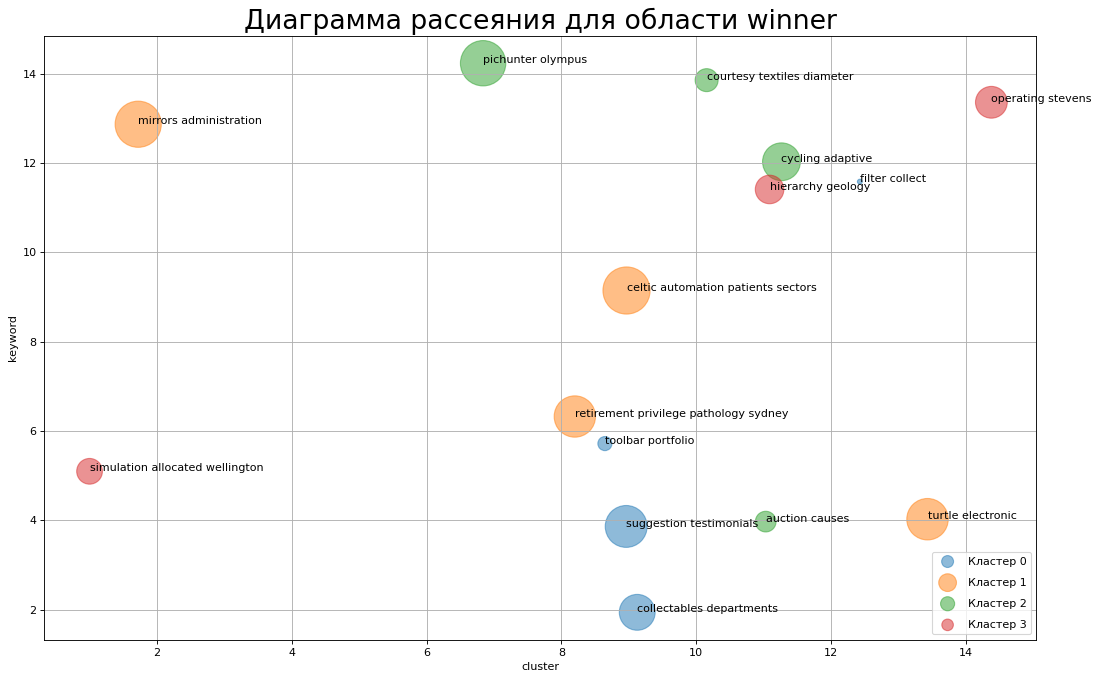

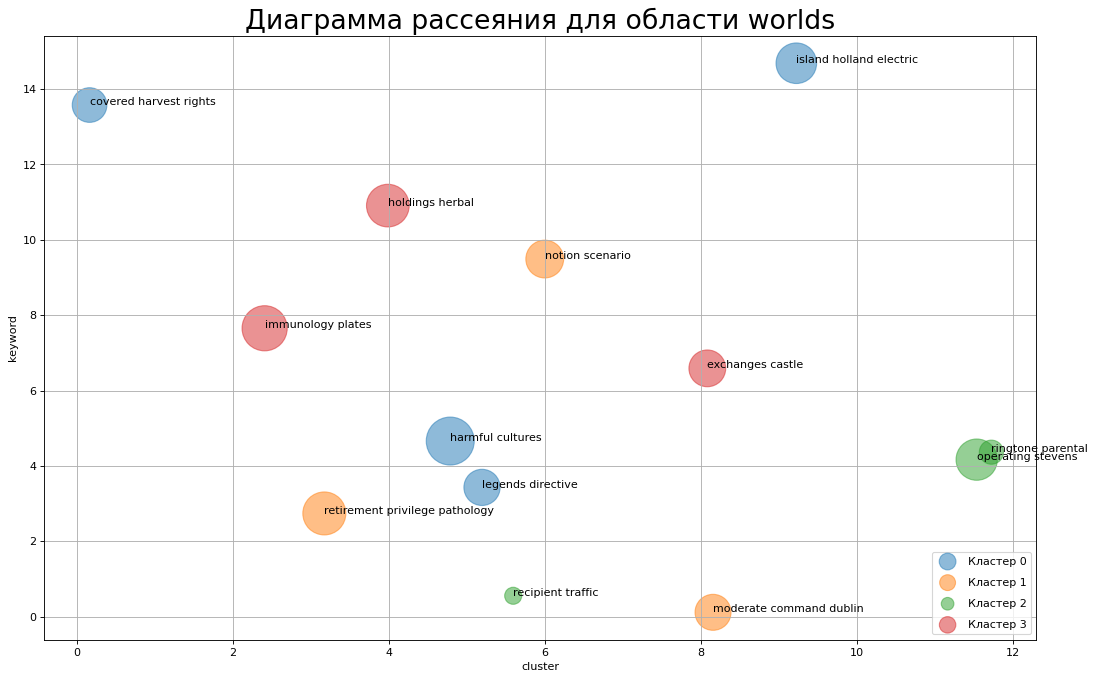

In [3]:
for area in list(output_data['area'].unique()):
    
    plt.figure(figsize=(16, 10), dpi=80, facecolor="w", edgecolor="k")
    plt.grid()

    data = output_data.loc[output_data['area'] == area, :]
    
    for cluster in data['cluster_name'].unique():

        plt.scatter(
            x = data.loc[data['cluster_name'] == cluster, :]['x'],
            y = data.loc[data['cluster_name'] == cluster, :]['y'],
            s = data.loc[data['cluster_name'] == cluster, :]['count'],
            c = data.loc[data['cluster_name'] == cluster, :]['color'],
            alpha = 0.5,
            label=str(cluster)
        )

        keywords = data.loc[data['cluster_name'] == cluster, :]['keyword']

        for j in keywords:
            plt.text(x=data.loc[data['keyword'] == j, :]['x'], 
                     y=data.loc[data['keyword'] == j, :]['y'],
                     s=j)

    plt.title('Диаграмма рассеяния для области ' + area, size = 24)
    plt.xlabel('cluster')
    plt.ylabel('keyword')
    plt.legend(markerscale=0.4, labelspacing=1, loc='lower right')
    plt.savefig(area + '.svg', format='svg')
    plt.show()